# 198 Pan-Cancer Cell Lines Marker Selection

In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
from scipy.io import mmread

sc.settings.verbosity = 3

In [2]:
obs = pd.read_table("../../pancancer/Metadata.txt", index_col=0, skiprows=[1])

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
#adata = sc.read_text("../../pancancer/GSE157220_CPM_data.txt.gz")
#adata = adata.T

In [4]:
#adata.write_h5ad("../../pancancer/GSE157220_CPM_data.h5ad")

In [5]:
adata = sc.read_h5ad("../../pancancer/GSE157220_CPM_data.h5ad")

In [6]:
adata.obs = obs.loc[adata.obs_names]

normalizing counts per cell
    finished (0:00:02)


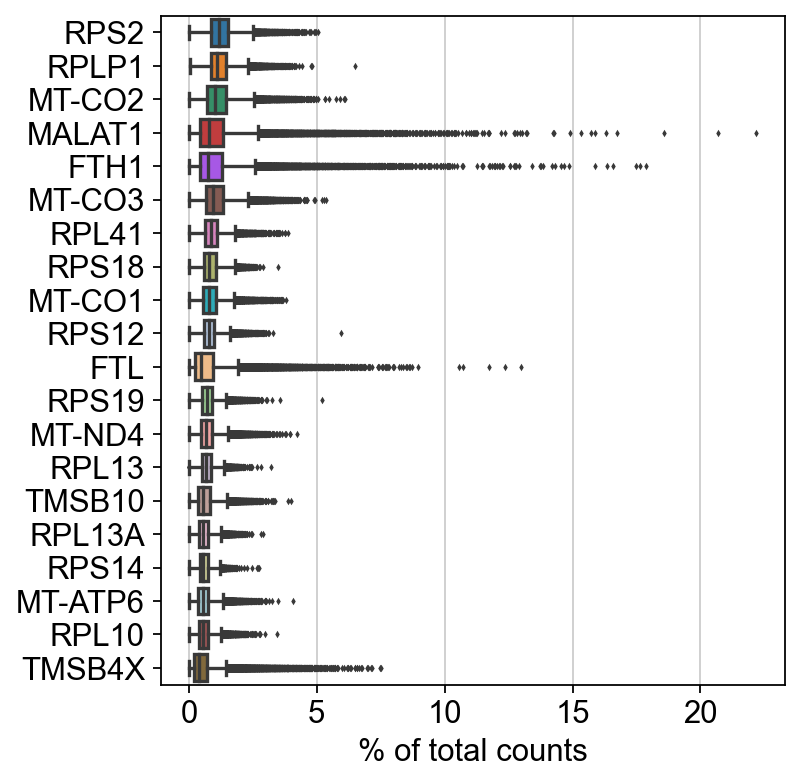

In [7]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.highest_expr_genes(adata, n_top=20)

In [8]:
#sc.pp.filter_cells(adata, min_genes=100)
#sc.pp.filter_genes(adata, min_cells=5)

In [9]:
# adata = adata[adata.obs.pct_counts_mt < 25, :]

In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [11]:
sc.pp.log1p(adata)

extracting highly variable genes
    finished (0:00:12)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


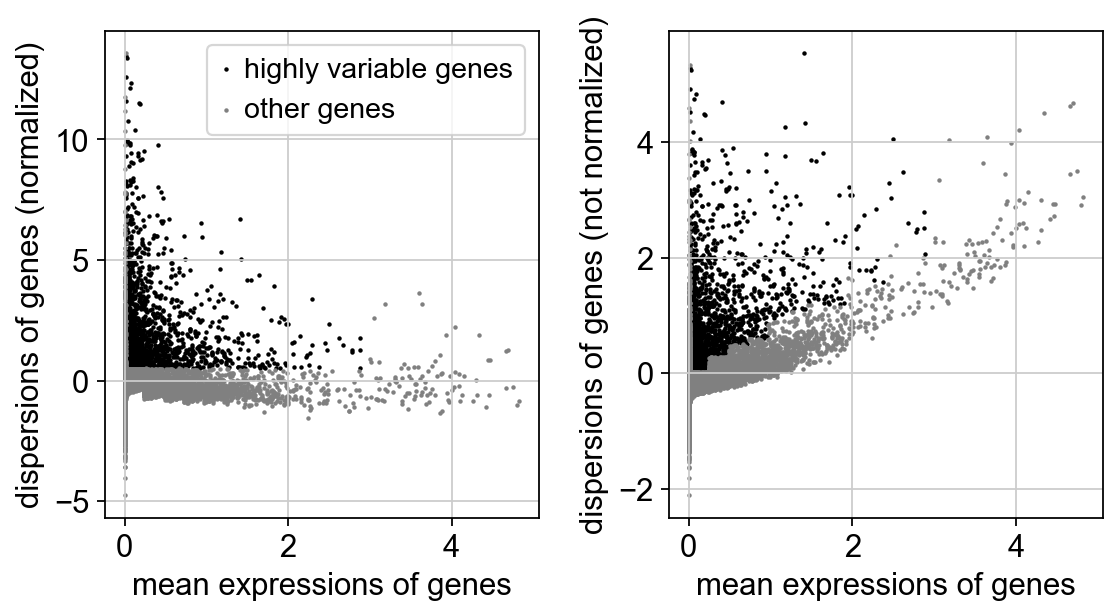

In [12]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [13]:
adata.var.highly_variable.sum()

2208

In [14]:
adata.raw = adata

In [15]:
adata = adata[:, adata.var.highly_variable]

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [16]:
sc.pp.scale(adata, max_value=10)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\scanpy\preprocessing\_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
adata.obs.head()

,Cell_line,Pool_ID,Cancer_type,Genes_expressed,Discrete_cluster_minpts5_eps1.8,Discrete_cluster_minpts5_eps1.5,Discrete_cluster_minpts5_eps1.2,CNA_subclone,SkinPig_score,EMTI_score,EMTII_score,EMTIII_score,IFNResp_score,p53Sen_score,EpiSen_score,StressResp_score,ProtMatu_score,ProtDegra_score,G1/S_score,G2/M_score
AAACCTGAGACATAAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4318,NaN,NaN,NaN,NaN,0.166,-0.045,-0.935,-0.935,0.130,0.619,1.869,-0.004,0.805,0.896,0.424,-1.125
AACGTTGTCACCCGAG-1-18,NCIH2126_LUNG,18,Lung Cancer,5200,NaN,NaN,NaN,NaN,-0.213,0.035,-1.027,-1.027,0.066,1.049,1.267,0.252,1.299,1.610,0.624,-0.048
AACTGGTAGACACGAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4004,NaN,NaN,NaN,NaN,-0.101,-0.183,-0.677,-0.677,0.304,0.822,2.401,0.141,0.451,1.225,-0.795,0.064
AACTGGTAGGGCTTGA-1-18,NCIH2126_LUNG,18,Lung Cancer,4295,NaN,NaN,NaN,NaN,-0.014,-0.093,-0.735,-0.735,0.094,0.834,2.282,0.150,0.267,0.892,-0.238,1.118
AACTGGTAGTACTTGC-1-18,NCIH2126_LUNG,18,Lung Cancer,4842,NaN,NaN,NaN,NaN,0.006,-0.055,-0.821,-0.821,0.034,0.960,1.400,-0.012,-0.276,-0.428,0.267,0.791


computing PCA
    on highly variable genes
    with n_comps=100


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:08)


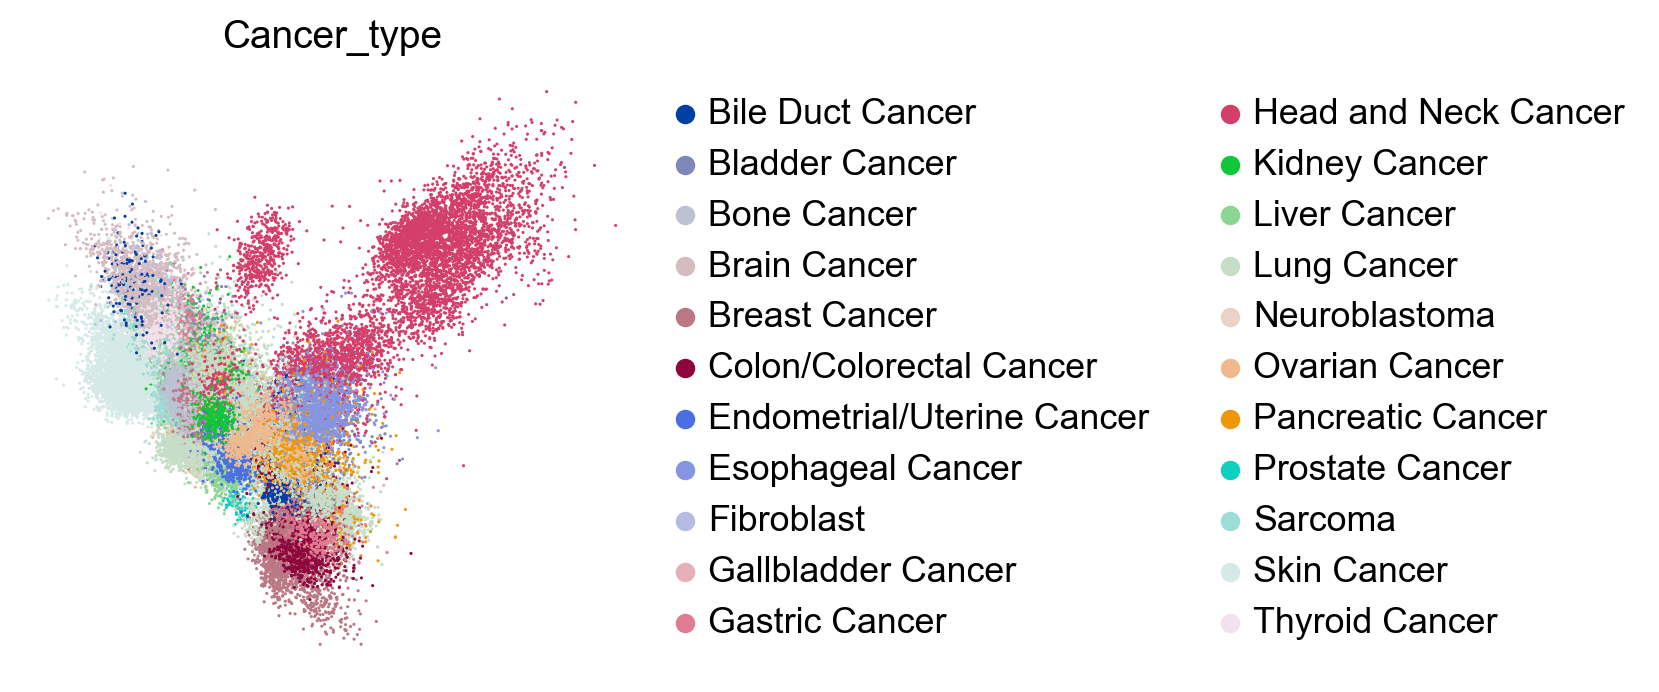

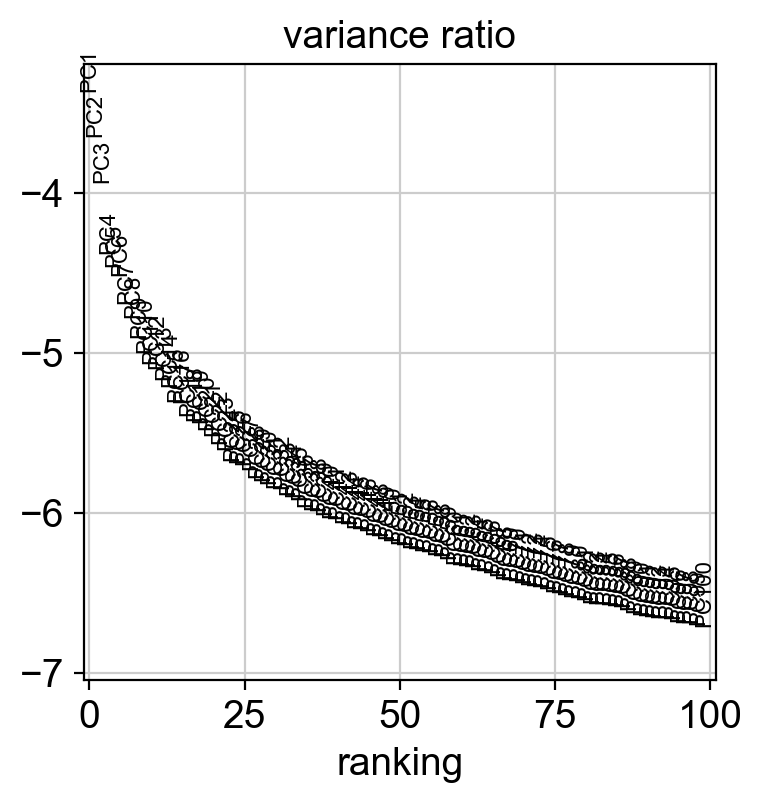

In [23]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.tl.pca(adata, svd_solver='arpack', n_comps=100)
sc.pl.pca(adata, color=['Cancer_type'], size=5., frameon=False)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:47)


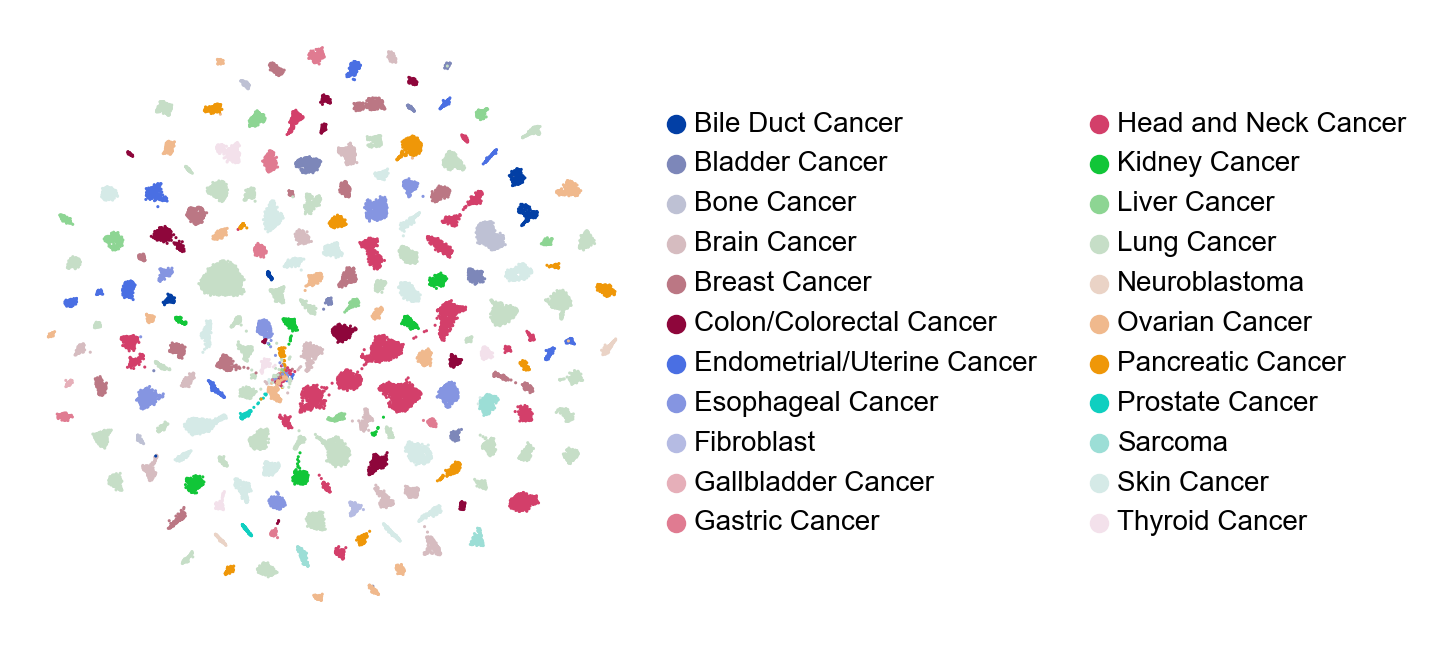

In [24]:
sc.pp.neighbors(adata, n_pcs=100)
sc.tl.umap(adata)
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color=['Cancer_type'], frameon=False, size=5., legend_fontsize=10, title="")

In [33]:
adata.obs.Cell_line.unique()

['NCIH2126_LUNG', 'SW579_THYROID', 'C32_SKIN', 'NCIH446_LUNG', 'HEC251_ENDOMETRIUM', ..., 'SCC9_UPPER_AERODIGESTIVE_TRACT', 'JHU011_UPPER_AERODIGESTIVE_TRACT', '93VU_UPPER_AERODIGESTIVE_TRACT', 'SCC90_UPPER_AERODIGESTIVE_TRACT', 'JHU006_UPPER_AERODIGESTIVE_TRACT']
Length: 198
Categories (198, object): ['NCIH2126_LUNG', 'SW579_THYROID', 'C32_SKIN', 'NCIH446_LUNG', ..., 'JHU011_UPPER_AERODIGESTIVE_TRACT', '93VU_UPPER_AERODIGESTIVE_TRACT', 'SCC90_UPPER_AERODIGESTIVE_TRACT', 'JHU006_UPPER_AERODIGESTIVE_TRACT']

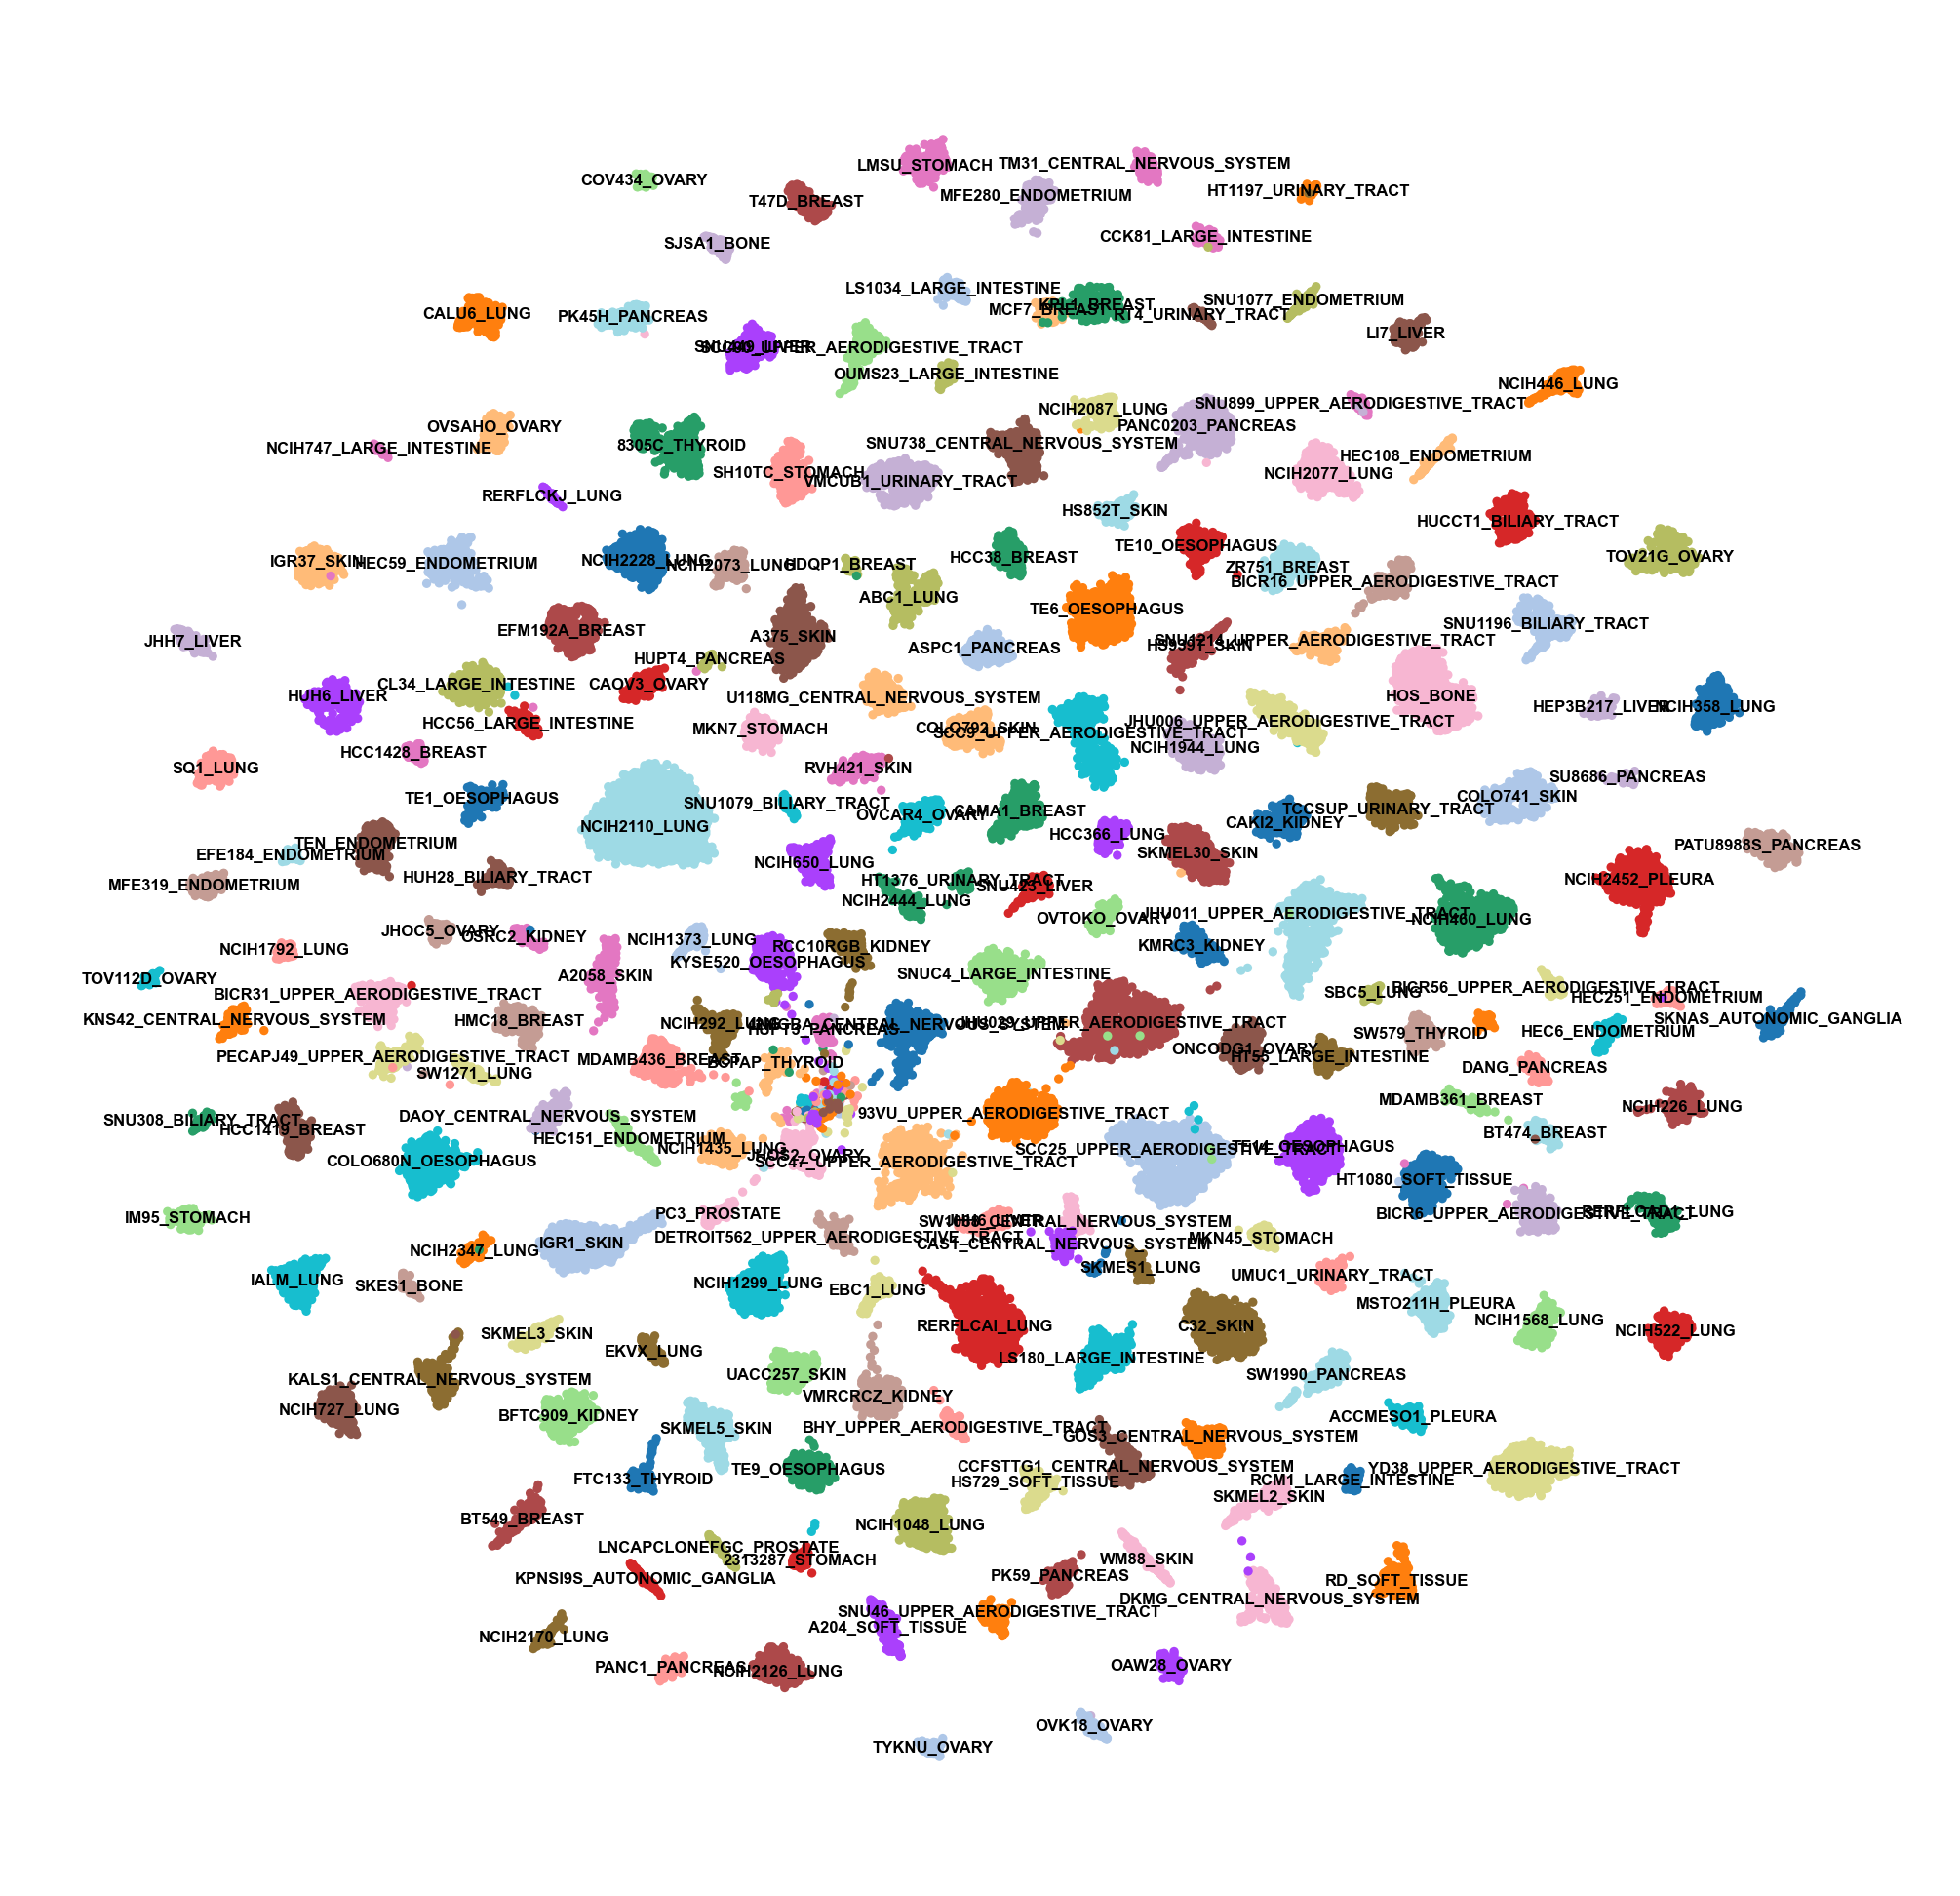

In [39]:
sc.settings.set_figure_params(dpi=300, facecolor='white')
sc.pl.umap(adata, color=['Cell_line'], frameon=False, legend_loc="on data", size=5., legend_fontsize=2., title="", palette=sc.pl.palettes.default_20)

## SCMER Feature Selection

In [41]:
import sys
sys.path.insert(0,'..')
import compactmarker
model = compactmarker.UmapL1(w=1., lasso=2e-4, ridge=2e-4, n_pcs=50, perplexity=100., use_beta_in_Q=True, n_threads=6)
model.fit(adata.X, batches=adata.obs['Cancer_type'].values)

Batch Bile Duct Cancer with 739 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 6 threads...
Mean value of sigma: 1.378048
Done. Elapsed time: 2.58 seconds. Total: 2.58 seconds.
Batch Bladder Cancer with 1291 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 6 threads...
Mean value of sigma: 1.198487
Done. Elapsed time: 3.20 seconds. Total: 5.78 seconds.
Batch Bone Cancer with 1030 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 6 threads...
Mean value of sigma: 1.069480
Done. Elapsed time: 2.83 seconds. Total: 8.61 seconds.
Batch Brain Cancer with 2967 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 6 threads...
Mean value of sigma: 1.197244
Done. Elapsed time: 9.03 seconds. Total: 17.64 seconds.
Batch Breast Cancer with 3285 instances.
Calculating distance matrix and scaling factor

KeyboardInterrupt: 

## Validation

In [59]:
rhp_df = pd.read_excel('../../pancancer/41588_2020_726_MOESM3_ESM.xlsx', sheet_name='Table S4', skiprows=3)
rhp_nmf = {rhp_df.columns[i]: rhp_df[rhp_df.columns[i]].dropna().tolist() for i in range(12)}

In [58]:
rhp_df = pd.read_excel('../../pancancer/41588_2020_726_MOESM3_ESM.xlsx', sheet_name='Table S7', skiprows=3)
rhp_vivo = {rhp_df.columns[i]: rhp_df[rhp_df.columns[i]].dropna().tolist() for i in range(21)}

In [60]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

established_markers = rhp_nmf
selected_markers = adata.var_names[model.w > 0]
all_markers = adata.var_names.tolist()
for i in established_markers:
    temp = " ".join((i, str(len(set(established_markers[i]).intersection(set(selected_markers)))), 
                     '/', str(len(set(established_markers[i]).intersection(set(all_markers)))), 
                     "(", str(len(established_markers[i])), "): "))
    printmd(temp + '_' + '_, _'.join(set(established_markers[i]).intersection(set(selected_markers))) + '_')

Cell Cycle - G1/S 2 / 12 ( 46 ): _HIST1H1C_, _HMGB2_

Cell Cycle - G2/M 7 / 30 ( 62 ): _CKS2_, _MKI67_, _TOP2A_, _AURKA_, _UBE2S_, _CENPF_, _HMGB2_

Skin Pigmentation 4 / 37 ( 47 ): _MLANA_, _DCT_, _CAPN3_, _APOE_

EMT I 23 / 63 ( 79 ): _THBS1_, _ACTG2_, _C12orf75_, _TGFBI_, _S100A4_, _PRSS23_, _KRT81_, _MYL9_, _KRT7_, _CCND1_, _LIMCH1_, _FN1_, _PMEPA1_, _CAV1_, _PEG10_, _TGM2_, _S100A16_, _FOSL1_, _DKK1_, _TPM1_, _SFRP1_, _DCBLD2_, _CXCL1_

EMT II 18 / 24 ( 28 ): _LAMC2_, _INHBA_, _VIM_, _AXL_, _THBS1_, _IGFBP7_, _FST_, _IL32_, _CST6_, _TPM1_, _SERPINE1_, _IGFBP3_, _FN1_, _PRSS23_, _AKAP12_, _PMEPA1_, _MYL9_, _TAGLN_

IFN Response 5 / 39 ( 49 ): _ISG15_, _IFIT3_, _IL7R_, _HLA-B_, _OASL_

EMT III 15 / 43 ( 49 ): _LAMC2_, _INHBA_, _KLK10_, _G0S2_, _LCN2_, _WFDC2_, _IL32_, _S100A14_, _CST6_, _DMKN_, _SERPINE1_, _FN1_, _SLPI_, _NEAT1_, _LAMB3_

p53-Dependent Senescence  6 / 13 ( 19 ): _ISG15_, _KRT19_, _S100P_, _SLPI_, _IFI27_, _NEAT1_

Epithelial Senescence 11 / 37 ( 38 ): _ADIRF_, _LCN2_, _WFDC2_, _S100P_, _S100A14_, _NEAT1_, _KRT13_, _SLPI_, _AGR2_, _CXCL1_, _LY6D_

Stress Response 0 / 29 ( 36 ): __

Protein Maturation 1 / 13 ( 34 ): _LAMB3_

Proteasomal Degradation 2 / 8 ( 46 ): _EIF4A1_, _PRDX1_

In [61]:
established_markers = rhp_vivo
selected_markers = adata.var_names[model.w > 0]
all_markers = adata.var_names.tolist()
for i in established_markers:
    temp = " ".join((i, str(len(set(established_markers[i]).intersection(set(selected_markers)))), 
                     '/', str(len(set(established_markers[i]).intersection(set(all_markers)))), 
                     "(", str(len(established_markers[i])), "): "))
    printmd(temp + '_' + '_, _'.join(set(established_markers[i]).intersection(set(selected_markers))) + '_')

GBM.MES2_orig 4 / 32 ( 50 ): _AKAP12_, _SLC2A3_, _VIM_, _IGFBP3_

GBM.MES1_orig 14 / 35 ( 50 ): _VIM_, _S100A16_, _SPP1_, _IFITM3_, _IGFBP7_, _MT1E_, _APOE_, _MGP_, _S100A11_, _TAGLN2_, _S100A10_, _SERPINE1_, _FN1_, _MGST1_

GBM.AC_orig 2 / 18 ( 39 ): _RAMP1_, _S100A16_

GBM.OPC_orig 2 / 18 ( 50 ): _THY1_, _FABP5_

GBM.NPC1_orig 2 / 19 ( 50 ): _SOX11_, _BEX1_

GBM.NPC2_orig 2 / 26 ( 50 ): _SOX11_, _UCHL1_

HNSCC.PEMT_orig 20 / 62 ( 100 ): _INHBA_, _THBS1_, _ARPC1B_, _MMP2_, _IGFBP3_, _TGFBI_, _OCIAD2_, _PRSS23_, _TAGLN_, _VIM_, _IGFBP7_, _MMP1_, _CAV1_, _LAMC2_, _COL1A1_, _TPM4_, _IL32_, _TPM1_, _SERPINE1_, _LAMB3_

HNSCC.Epidif.1_orig 10 / 62 ( 100 ): _ALDH3B2_, _HIST1H1C_, _KLK10_, _PDZK1IP1_, _LCN2_, _CEACAM6_, _S100P_, _DMKN_, _SLPI_, _LY6D_

HNSCC.Epidif.2_orig 6 / 34 ( 100 ): _S100A16_, _S100A14_, _FABP5_, _MAL2_, _AKR1B10_, _LY6D_

HNSCC.Stress_orig 4 / 63 ( 100 ): _ID1_, _FOSL1_, _CD74_, _LAMB3_

HNSCC.Hypoxia_orig 6 / 47 ( 100 ): _HIST1H1C_, _ENO1_, _SERPINE1_, _GJB6_, _IGFBP3_, _IGFBP2_

melanoma.MITF_orig 4 / 43 ( 100 ): _MLANA_, _CAPN3_, _ARPC1B_, _APOE_

melanoma.AXL_orig 11 / 53 ( 100 ): _AXL_, _S100A16_, _LCN2_, _FOSL1_, _SLC16A3_, _S100A4_, _SERPINE1_, _S100A10_, _IGFBP3_, _FN1_, _SH3BGRL3_

melanoma.Inflammatory_orig 8 / 68 ( 229 ): _CKS2_, _SPP1_, _PAGE5_, _AKR1B1_, _SLC16A3_, _TM4SF1_, _SERPINE1_, _SLC2A3_

pemt.metaprogram 14 / 39 ( 45 ): _TGFBI_, _LAMC2_, _INHBA_, _VIM_, _THBS1_, _IGFBP7_, _IL32_, _MMP2_, _SERPINE1_, _TPM1_, _KRT8_, _MMP1_, _LAMB3_, _TAGLN_

HNSCC.episen_curr 16 / 61 ( 85 ): _ALDH3B2_, _KLK10_, _ISG15_, _CALML5_, _PDZK1IP1_, _KRT23_, _LCN2_, _CEACAM6_, _S100P_, _CST6_, _DMKN_, _FABP5_, _SLPI_, _IGFL2_, _AKR1B10_, _LY6D_

hypoxia_curr 2 / 23 ( 40 ): _SLC2A3_, _IGFBP3_

immune.resp_curr 8 / 32 ( 46 ): _THY1_, _COL1A1_, _RARRES2_, _S100A4_, _CD74_, _IFI27_, _IFITM2_, _COL1A2_

HNSCC.melanoma.stress_curr 5 / 46 ( 63 ): _CKS2_, _ID1_, _FOSL1_, _IL32_, _CXCL1_

g1.s_curr 1 / 11 ( 55 ): _HMGB2_

g2.m_curr 5 / 25 ( 69 ): _CKS2_, _TOP2A_, _AURKA_, _CENPF_, _HMGB2_

In [62]:
weight_df = pd.DataFrame(model.w[model.w > 0.], index=adata.var_names[model.w > 0.])
weight_df.to_pickle("pancancer-247-weights.pkl")
weight_df.to_csv("pancancer-247-weigths.csv")